In [ ]:
script_path = "/n/home02/amphillips/p26/scripts" # for cannon
# script_path = "/Users/anyaphillips/Desktop/harvard/research/papers/p26/scripts"

import sys

# sys.path.append("/Users/anyaphillips/Downloads/software/petar_install/include") # for my machine

import petar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.table import Table
from scipy.stats import binned_statistic_2d


import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.dynamics import mockstream as ms

from gala.units import galactic

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D


from tqdm import tqdm


sys.path.append(script_path)
# from analyze_petar import analyze_petar
import PETAR_ANALYSIS_FUNCTIONS as paf
import astropy.constants as const
from streamframe import StreamFrame
from scipy.stats import binned_statistic

import matplotlib.pyplot as plt
plt.style.use(script_path+'/vedant.mplstyle')
%config InlineBackend.figure_format='retina'

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import curve_fit
from scipy.stats import binom

import io

/n/home02/amphillips/.conda/envs/petar_env/lib/python3.10/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


In [ ]:
paths = paf.define_paths()
simcolm_colors, hm_colors, simcolors = paf.define_simcolors()
time_cmap = paf.define_time_cmap()

init_displacements = paf.define_init_displacements()
apocenters = paf.define_apocenters()

In [ ]:
dissolution_times, plotting_times_peri, plotting_times_apo = paf.get_tdis_tplot(paths)

# final plot

In [5]:
# we're experimenting with smoothing...
from scipy.ndimage import gaussian_filter1d

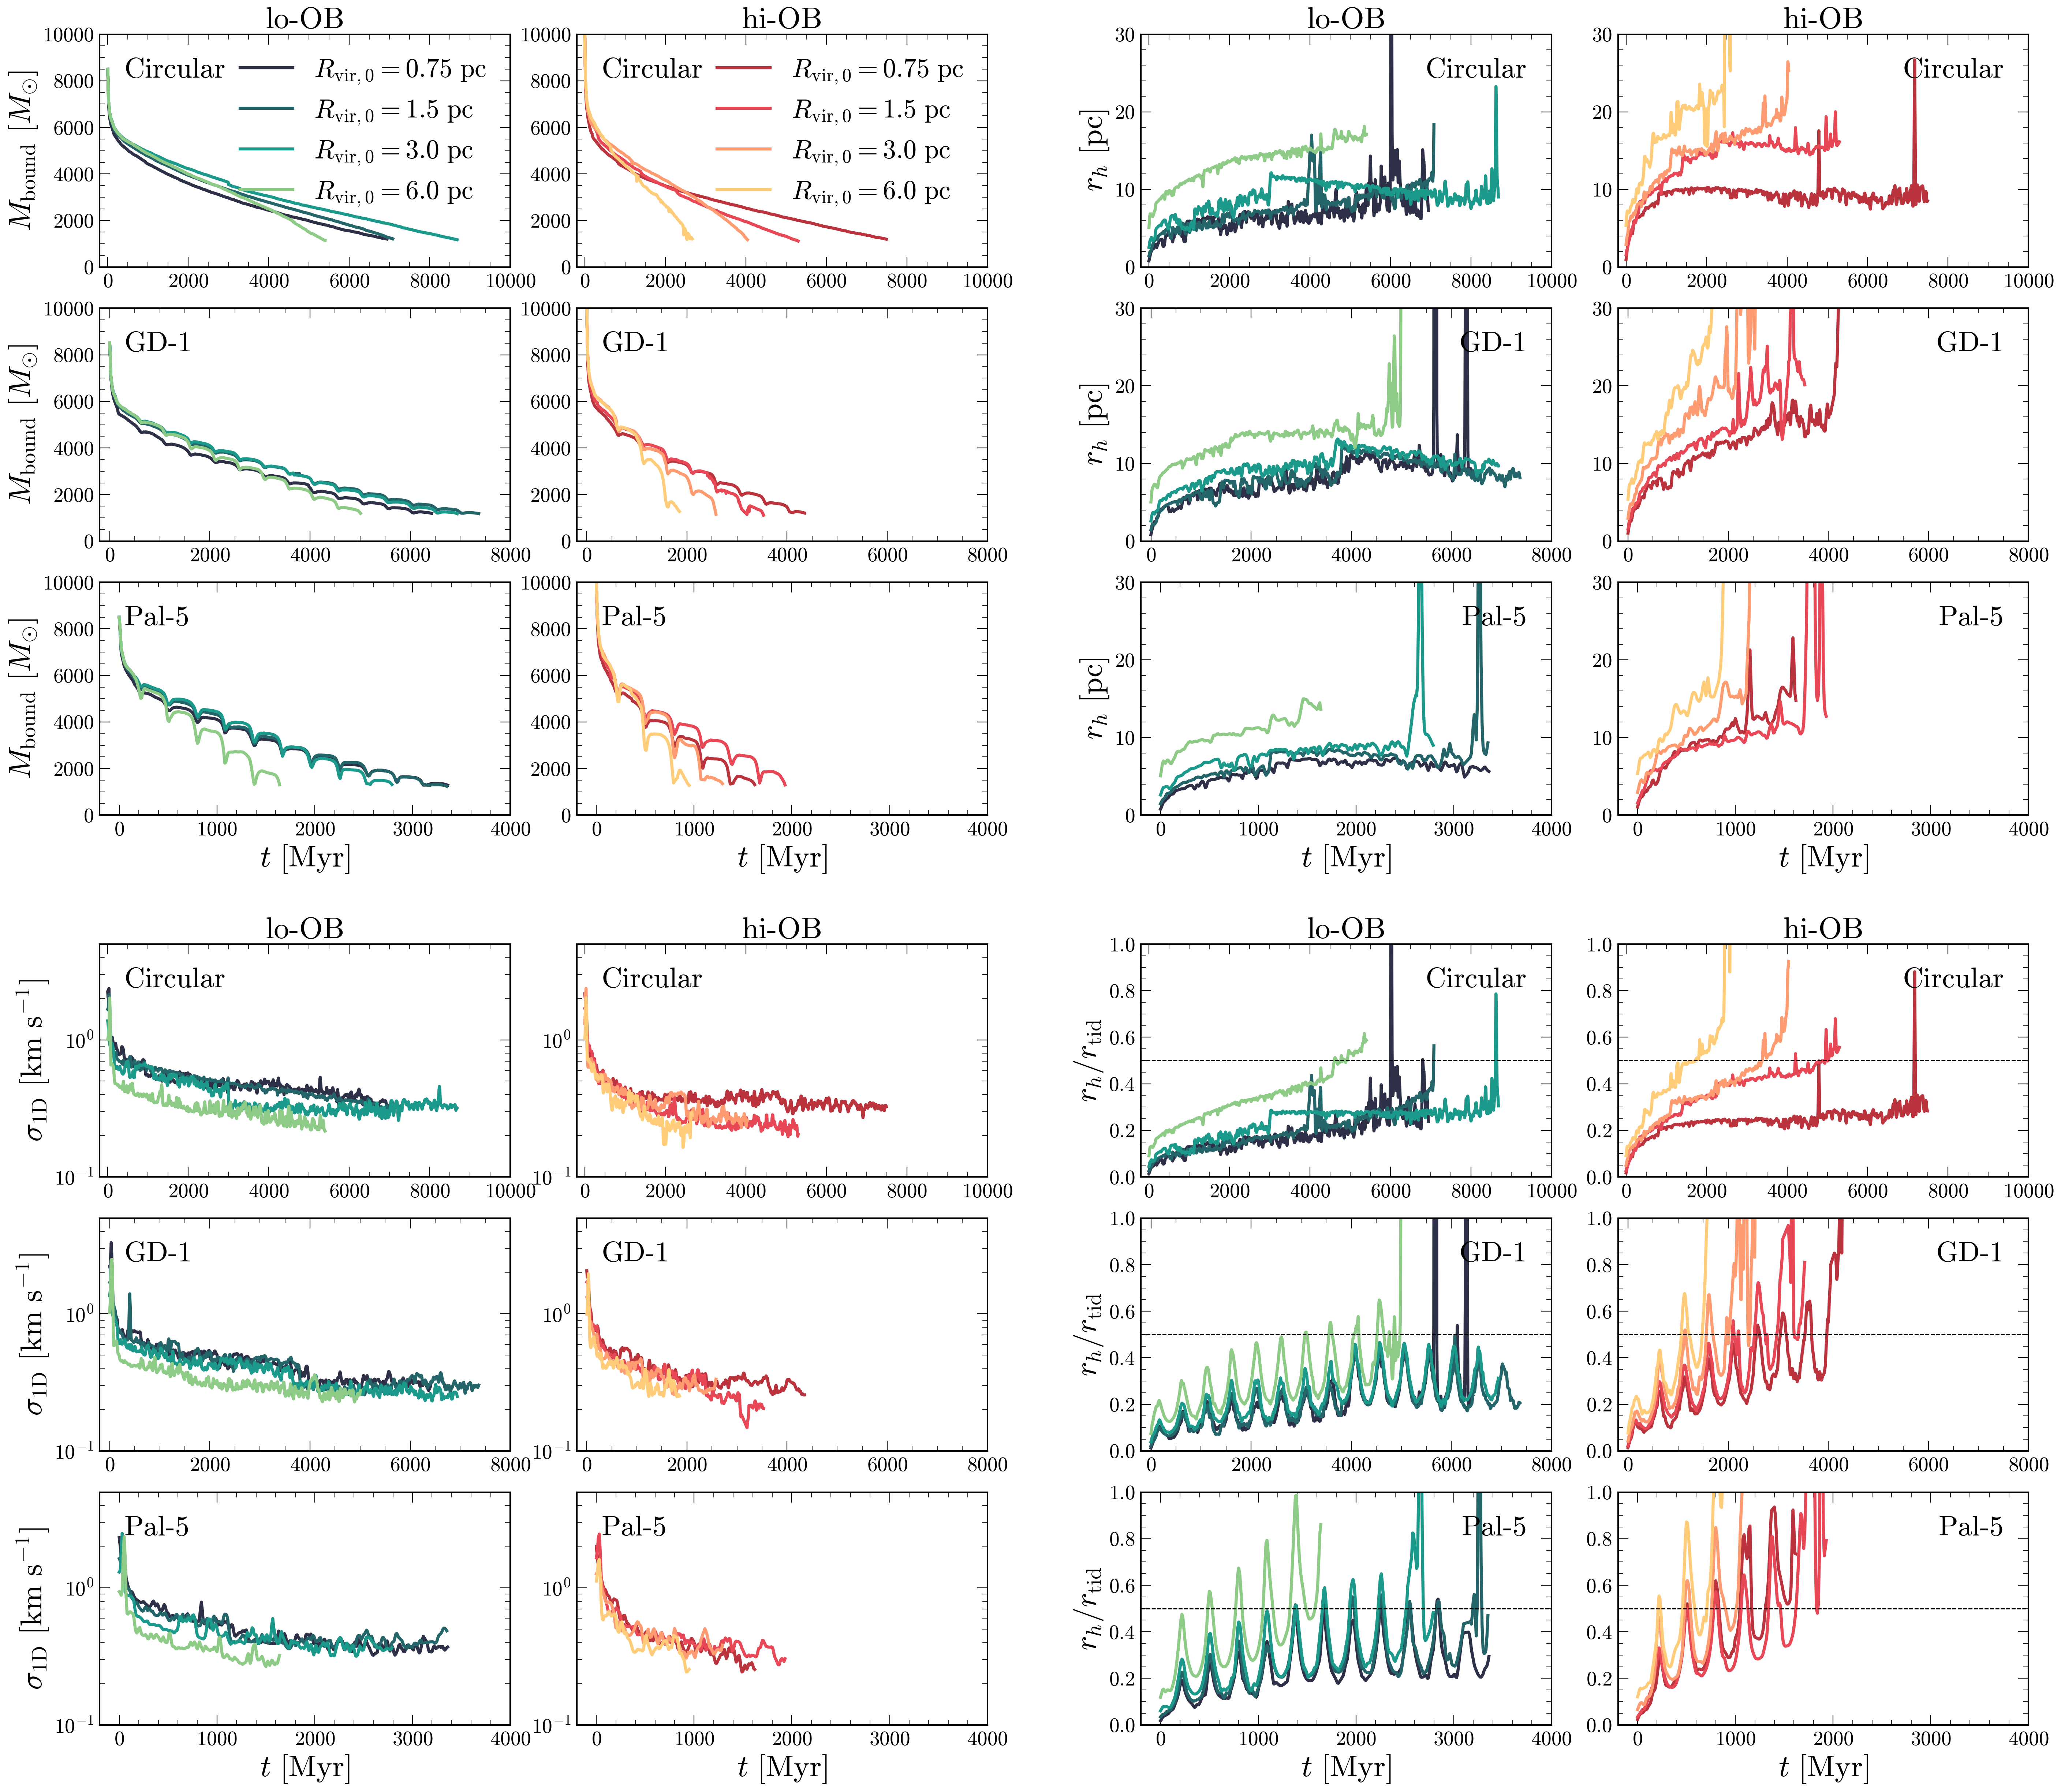

In [ ]:
# npz_path = "/n/holystore01/LABS/conroy_lab/Lab/amphillips/finished_grid/ALT_evolution_npzs/"
npz_path = "/n/netscratch/conroy_lab/Lab/amphillips/small_grid/structure_npzs_REAL/"

quantities_to_plot = ['mbound','rh_energy','dispersion_rtid','radius_ratio']
quantity_labels = [r"$M_{\rm{bound}}\ [M_{\odot}]$",
                    r"$r_h\ \rm{[pc]}$", 
                    r"$\sigma_{\rm 1D}\ \rm{[km\ s^{-1}]}$",
                      r"$r_h/r_{\rm{tid}}$"]


# xlims = [[-200,12600],[-200,10200],[-200,5200]]
xlims = [[-200,10000],[-200,8000],[-200,4000]]

axspace=0.05
fig, axs_grid = plt.subplots(7,5, figsize=[34,30],
                        width_ratios=[1,1,axspace,1,1],height_ratios = [1,1,1,4*axspace,1,1,1])

time_offset = 1000
tdis_frac = 0.9

for ax_row in axs_grid:
    ax_row[2].remove()
axs_grid = np.array(axs_grid)

for col in axs_grid.T:
    ax = col[3]
    if ax is not None and ax in fig.axes:
        fig.delaxes(ax)
        col[3] = None


n_grid = [[[0,2,4,6],[1,3,5,7]], # circular
          [[8,10,12,14],[9,11,13,15]], # GD-1
          [[16,18,20,22],[17,19,21,23]] # Pal-5
          ]
n_grid = np.array(n_grid)
evol_labels=[r"$R_{\rm{vir},0}=0.75\ \rm{pc}$",
              r"$R_{\rm{vir},0}=1.5\ \rm{pc}$",
              r"$R_{\rm{vir},0}=3.0\ \rm{pc}$",
              r"$R_{\rm{vir},0}=6.0\ \rm{pc}$"]

subgrids = [
    axs_grid[0:3, 0:2],  # top-left
    axs_grid[0:3, 3:5],  # top-right
    axs_grid[4:7, 0:2],  # bottom-left
    axs_grid[4:7, 3:5],  # bottom-right
]


# smoothing_sigmas = [0,10,10,1]


orbit_shapes = ["Circular", "GD-1", "Pal-5"]
skipped = []

ylims = [[0,10000], # bound mass
         [0,30], # rh
         [1e-1,5], # velocity dispersion
         [0,1] # tidal filling factor. (prev. 3)
]



for j,subgrid in enumerate(subgrids):
    plot_quantity = quantities_to_plot[j]
    for ax in subgrid.flatten():
        ax.set_ylim(*ylims[j])
        
    if plot_quantity == "dispersion_rtid":
        for ax in subgrid.flatten():
            ax.set_yscale('log')
    for panel in subgrid[:,0]:
        # subgrid[1,0].set_ylabel(quantity_labels[j], fontsize=30)
        panel.set_ylabel(quantity_labels[j], fontsize=30)
    for panel in subgrid[-1]:
        panel.set_xlabel(r"$t\ \rm [Myr]$", fontsize=30)
    subgrid[0,0].set_title("lo-OB", fontsize=30)
    subgrid[0,1].set_title("hi-OB", fontsize=30)
    # for each orbitshape
    for jj, axs in enumerate(subgrid):
        # if j in [0,2]:
        
        if j in [0,2]:
            axs[0].text(0.06,0.9,orbit_shapes[jj],ha='left', va='top',transform=axs[0].transAxes, fontsize=28)
            axs[1].text(0.06,0.9,orbit_shapes[jj],ha='left', va='top',transform=axs[1].transAxes, fontsize=28)
        if j in [1,3]:
            axs[0].text(0.94,0.9,orbit_shapes[jj],ha='right', va='top',transform=axs[0].transAxes, fontsize=28)
            axs[1].text(0.94,0.9,orbit_shapes[jj],ha='right', va='top',transform=axs[1].transAxes, fontsize=28)

        n_to_plot_for_this_row = n_grid[jj]
        for jjj, ax in enumerate(axs):
            ax.set_xlim(xlims[jj])
            n_to_plot_for_this_panel = n_to_plot_for_this_row[jjj]
            for jjjj, n in enumerate(n_to_plot_for_this_panel):
                tidal = petar.Tidal(interrupt_mode='bse', external_mode='galpy')
                tidal.loadtxt(paths[n]+"data.tidal")

                # if n in skipped: ### don't need this. 
                #     x=[0]
                #     y=[0]
                #     ax.plot(x,y,c=simcolors[n], label=evol_labels[jjjj])
                #     continue
                tdis = int(tdis_frac * dissolution_times[n]) #- time_offset
                npz_file = np.load(npz_path+"%i_structure.npz"%n)
                i_list = npz_file['i_list']
                # print(n, len(i_list))
                if n==10:
                    i_list*=10
                    plot_cadence=1 # this sim only has 10 myr cadence outputs


                if n!=10:
                    plot_cadence =  10


                nbound = tidal.n[::plot_cadence]
                mbound = tidal.mass[::plot_cadence]
                rtid = tidal.rtid[::plot_cadence]

                i_list = i_list[::plot_cadence]
                crit = nbound>2500
                
                if j==0:
                    y_smooth = mbound
                    ax.plot(i_list[crit], y_smooth[crit], c=simcolors[n], label=evol_labels[jjjj])

                if j in [1,2]:
                    y = npz_file[plot_quantity][::plot_cadence]

                    
                    y_smooth = gaussian_filter1d(y, sigma=1) # 10 Myr smoothing sigma. 
                    
                    if j==2:
                        y/=np.sqrt(3)

                    ax.plot(i_list[crit], y_smooth[crit], c=simcolors[n], label=evol_labels[jjjj])

                if j==3:
                    # rh = npz_file['rh_100'][:tdis]
                    rh = npz_file['rh_energy'][::plot_cadence][crit]
                    rtid = rtid[crit]
                    y = rh/rtid
                    y_smooth = gaussian_filter1d(y, sigma=1)
                    ax.plot(i_list[crit], y_smooth, c=simcolors[n], label=evol_labels[jjjj])
                    ax.axhline(0.5, color='k', linestyle="--", linewidth=1)

                



axs_grid[0,0].legend(loc='upper right', fontsize=26)
axs_grid[0,1].legend(loc='upper right', fontsize=26)


plt.savefig("plots/structural_evolution_combined.pdf",dpi=300, bbox_inches='tight')

# escaper data. 

40.80141660502542
0.933524844877718
8.041979464850899
0.7333785581687027
15.626981637673653
27.849516852686488
8.030769930746134
14.307976169667166
51.15946925044938
0.6904235299992079
0.481000095165297
18.83132842113505
3.3253371768522197
7.339406946718501
9.75524611419507
2.9146589787995816
0.5764574995747134
3.632359931292582
6.394157324776613
1.0795835040478616
1.3908589690993334
4.942574819631549
8.138160632882892
3.6480372464766577


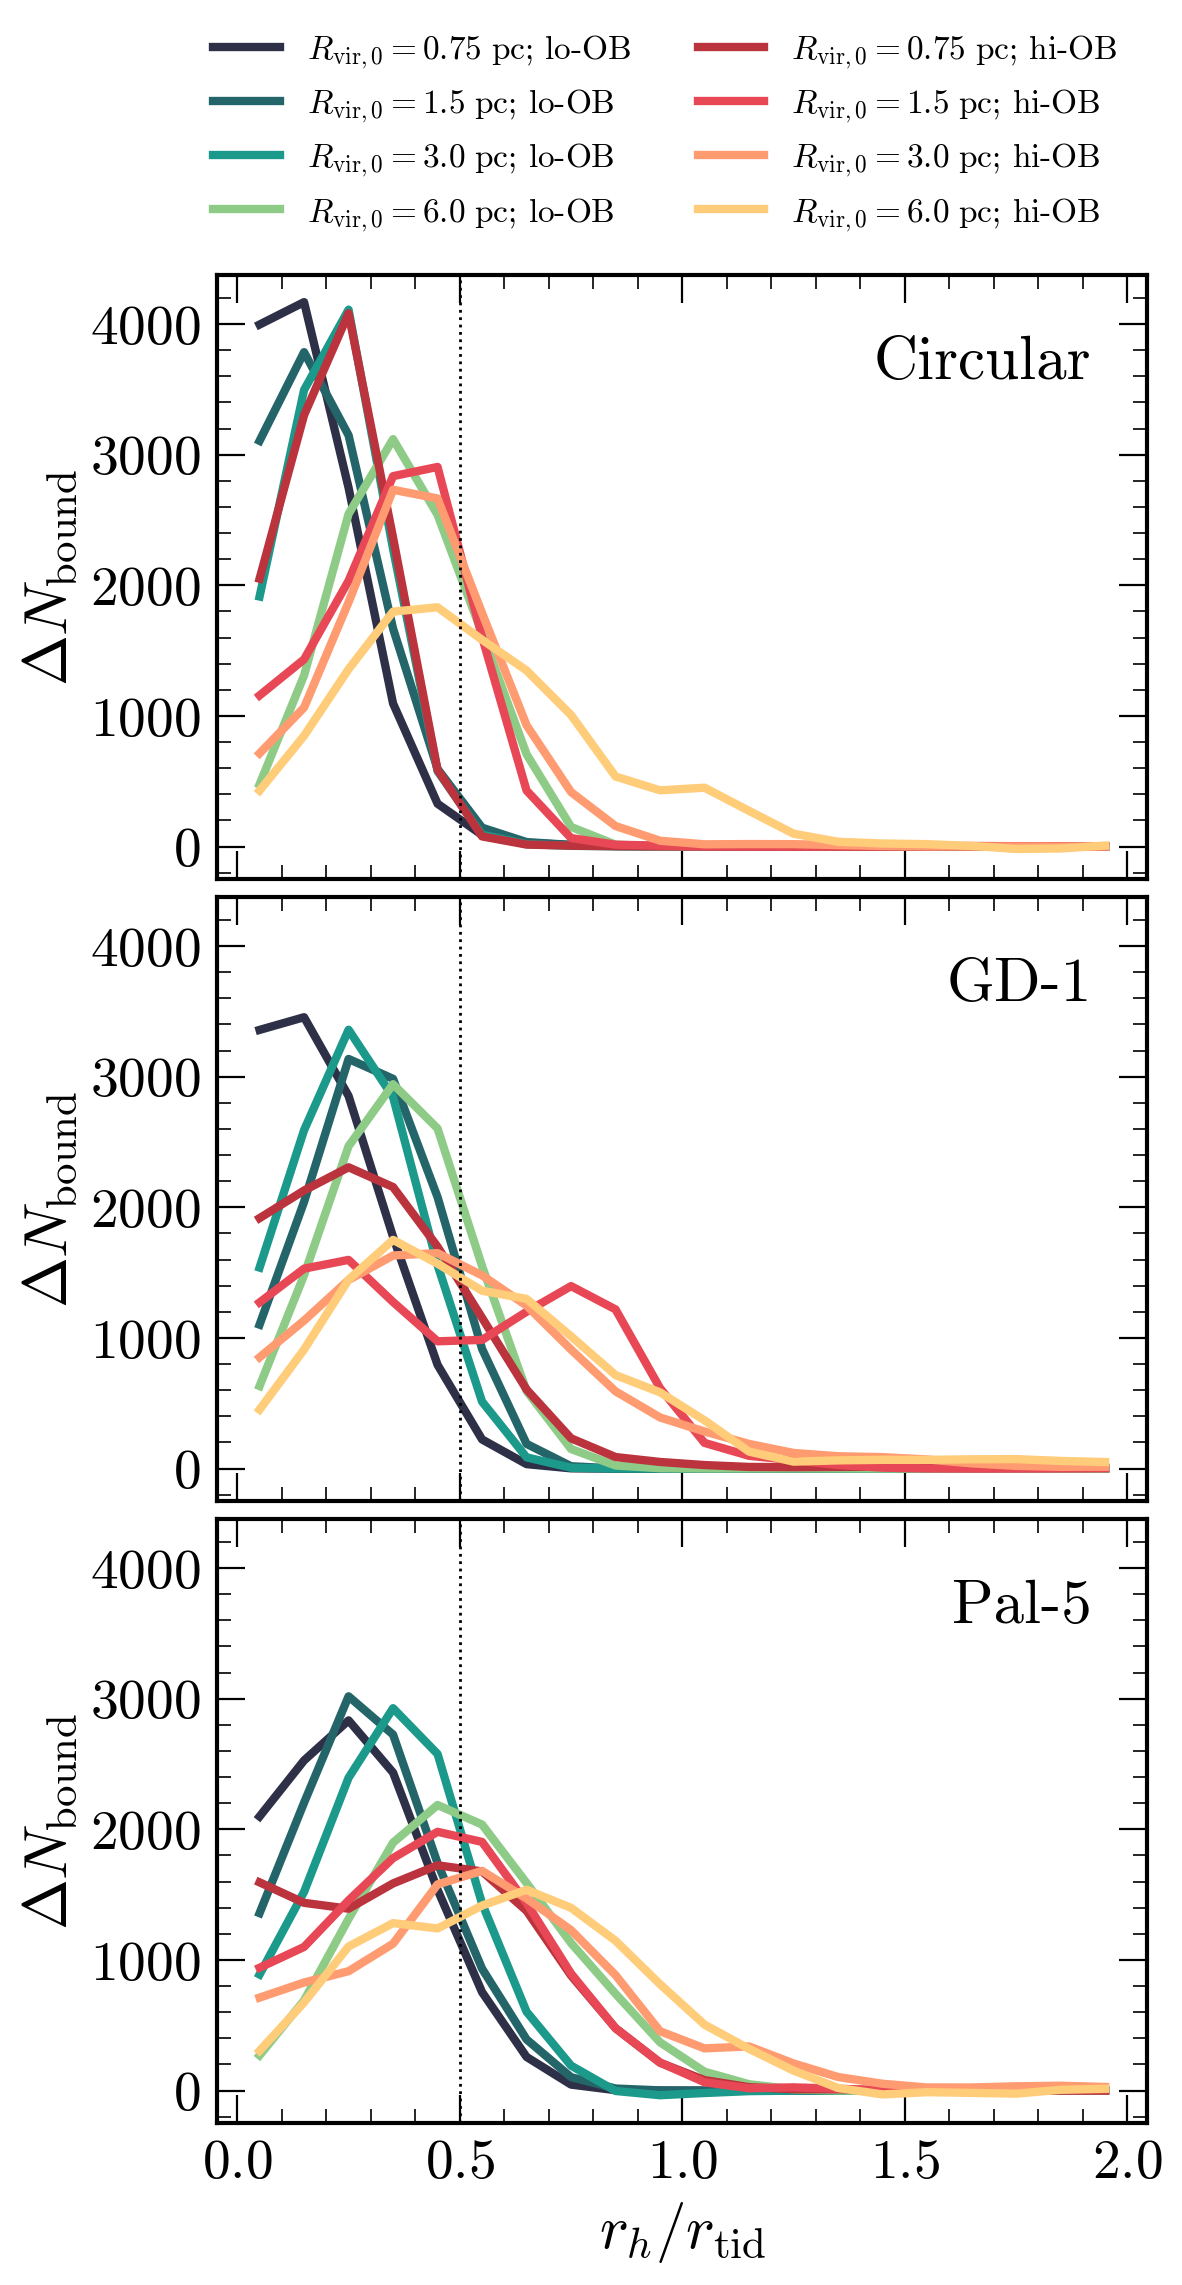

In [53]:
n_grid = [[[0,2,4,6],[1,3,5,7]], # circular
          [[8,10,12,14],[9,11,13,15]], # GD-1
          [[16,18,20,22],[17,19,21,23]] # Pal-5
          ]
n_grid = np.array(n_grid)
evol_labels=[r"$R_{\rm{vir},0}=0.75\ \rm{pc}$",
              r"$R_{\rm{vir},0}=1.5\ \rm{pc}$",
              r"$R_{\rm{vir},0}=3.0\ \rm{pc}$",
              r"$R_{\rm{vir},0}=6.0\ \rm{pc}$"]


fig, axs = plt.subplots(3,1, figsize=[6,12], sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.03, wspace=0.03)


for k, orbit_shape in enumerate(n_grid):
    ax = axs[k]
    
    for j, subgrid in enumerate(orbit_shape):
        label_addon = ["; lo-OB", "; hi-OB"][j]
        for kk, n in enumerate(subgrid):
            # tidal = petar.Tidal(interrupt_mode='bse')
            # tidal.loadtxt(paths[n]+"data.tidal")


            # load the file with the half mass radii over time
            npz_path = "/n/netscratch/conroy_lab/Lab/amphillips/small_grid/structure_npzs_REAL/" # cannon
            # npz_path = "/Users/anyaphillips/Desktop/harvard/research/data/grid_summary/structure_npzs_REAL/" # my machine

            npz_file = np.load(npz_path+"%i_structure.npz"%n)
            rh = npz_file['rh_energy']

            i_list = np.arange(0, len(rh), 1)


            tidal = petar.Tidal(interrupt_mode='bse')
            tidal.loadtxt(paths[n]+"data.tidal")
            # rtid = npz_file['rtid']
            rtid = tidal.rtid
            nbound = tidal.n

            delta_rtid = np.diff(rtid, prepend=rtid[0])
            delta_delta_rtid = np.diff(delta_rtid, prepend=delta_rtid[0]) ## ?? second derivative for smoothness -- actually doesn't help that much; just going to use the first derivative.

            # establish a criterion for when to include things? mostly for when rh behaves badly.
            valid = (nbound>2500) & (i_list<=dissolution_times[n]) & (np.abs(delta_rtid)<1)
            nbound=nbound[valid]
            # nbound = gaussian_filter1d(nbound[valid], sigma=10)



            # apply a smoothing function to rh ?
            rh_smooth = rh[valid] #gaussian_filter1d(rh[valid], sigma=10) # smooth here?
            

            # calculate the tidal filling factor (each timestep)
            # rh_rt = gaussian_filter1d(rh_smooth/rtid[valid], sigma=10) # apply the same smoothing as in the structural evolution plot
            rh_rt = rh_smooth/rtid[valid] # smooth here?

            # change in the number of stars at each timestep
            delta_ns = -(np.diff(nbound, prepend=nbound[0]))

            # bin in rh and compute a histogram that sums the changes to the number of bound stars
            dr=0.1
            max = np.max(rh_rt)
            print(max)
            rh_bins = np.arange(0.0, 2+dr, dr)
            bin_centers = (rh_bins[1:]+rh_bins[:-1])/2
            y, _,_ = binned_statistic(x=rh_rt, values=delta_ns, statistic='sum', bins=rh_bins)
            # print(np.sum(y))
            y_smooth = gaussian_filter1d(y, sigma=1) # smooth here?
            # y_smooth = y
            # sel_y = y_smooth>-9999 #(y_smooth>=0) & (y_smooth<7500)

            # plot
            ax.plot(bin_centers,y_smooth, color=simcolors[n], label=evol_labels[kk]+label_addon)


for ax in axs:
    ax.set_ylabel(r"$\Delta N_{\rm bound}$")
    # ax.set_xlim(0, 2)
    ax.axvline(0.5, c='k', linewidth=1, linestyle=":")

axs[-1].set_xlabel(r'$r_h/r_{\rm tid}$')
axs[0].legend(fontsize=12, bbox_to_anchor=[1,1.45], framealpha=0.5, ncol=2)



axs[0].text(0.94,0.9, "Circular", ha='right', va='top', transform=axs[0].transAxes)
axs[1].text(0.94,0.9, "GD-1", ha="right", va="top", transform=axs[1].transAxes)
axs[2].text(0.94,0.9, "Pal-5", ha='right', va='top', transform=axs[2].transAxes)


# axs[0].set_ylim(-100, 2800)
# axs[1].set_ylim(-100, 5000)
# axs[2].set_ylim(-100, 1100)

plt.savefig("plots/stars_lost_tidal_filling_factor.pdf", dpi=300, bbox_inches="tight")

# scratch for how to determine energetic boundedness: 

### approximating using the restricted 3-body problem

In [179]:
i = 60
n = 16
singles = petar.Particle(interrupt_mode='bse', external_mode='galpy')
singles.loadtxt(paths[n]+"data.%i.single"%i)

pot_stars = singles.pot * u.pc**2 / u.Myr**2

core_data = petar.Core(interrupt_mode='bse', external_mode='galpy')
core_data.loadtxt(paths[n]+"data.core")
core_pos = core_data.pos[i] * u.pc.to(u.kpc)
R0 = np.sqrt(np.sum(core_pos**2)) * u.kpc
core_vel = core_data.vel[i] * (u.pc/u.Myr).to(u.kpc/u.Myr)
core_w = np.hstack([core_pos, core_vel])

spos = singles.pos*u.pc.to(u.kpc) + core_pos
svel = singles.vel*(u.pc/u.Myr).to(u.kpc/u.Myr) + core_vel
single_w = np.hstack([spos, svel])

stream_obj = StreamFrame(sim_coords = single_w, prog_sim_coord=core_w)

In [180]:
# define the rotational velocity
Omega = stream_obj.prog_L_sim*(u.kpc**2 / u.Myr) / (2 * R0**2)

In [181]:
x, y, z = stream_obj.xs, stream_obj.ys, stream_obj.zs
xyzs = stream_obj.xyz_s * u.kpc
vx, vy, vz = stream_obj.vxs, stream_obj.vys, stream_obj.vzs
v2_stars = vx**2 +vy**2 + vz**2
v2_stars*=u.kpc/u.Myr

vxyzs = stream_obj.vxyz_s * u.kpc/u.Myr


In [182]:
# cts = []
# for xyz in tqdm(xyzs):
#     poteff_arg = np.cross(Omega, xyz)
#     coriolis_term = 1/2 * (np.sum(poteff_arg**2))
#     cts.append(coriolis_term.to(u.kpc**2/u.Myr**2).value)

# cts = np.array(cts) * u.kpc**2/u.Myr**2

# vectorized version of this:
# Cross product across all N positions
poteff_arg = np.cross(Omega, xyzs)  # shape (N, 3), keeps units

# Sum of squares along the last axis (magnitude squared)
mag2 = np.sum(poteff_arg**2, axis=1)  # shape (N,), units handled automatically

# Coriolis term: 1/2 * |Ω × r|²
cts = 0.5 * mag2

# Ensure final units are consistent and explicit
cts = cts.to(u.kpc**2 / u.Myr**2)

In [183]:
poteff = pot_stars - cts
ke = v2_stars**2 / 2

e_stars = ke + poteff

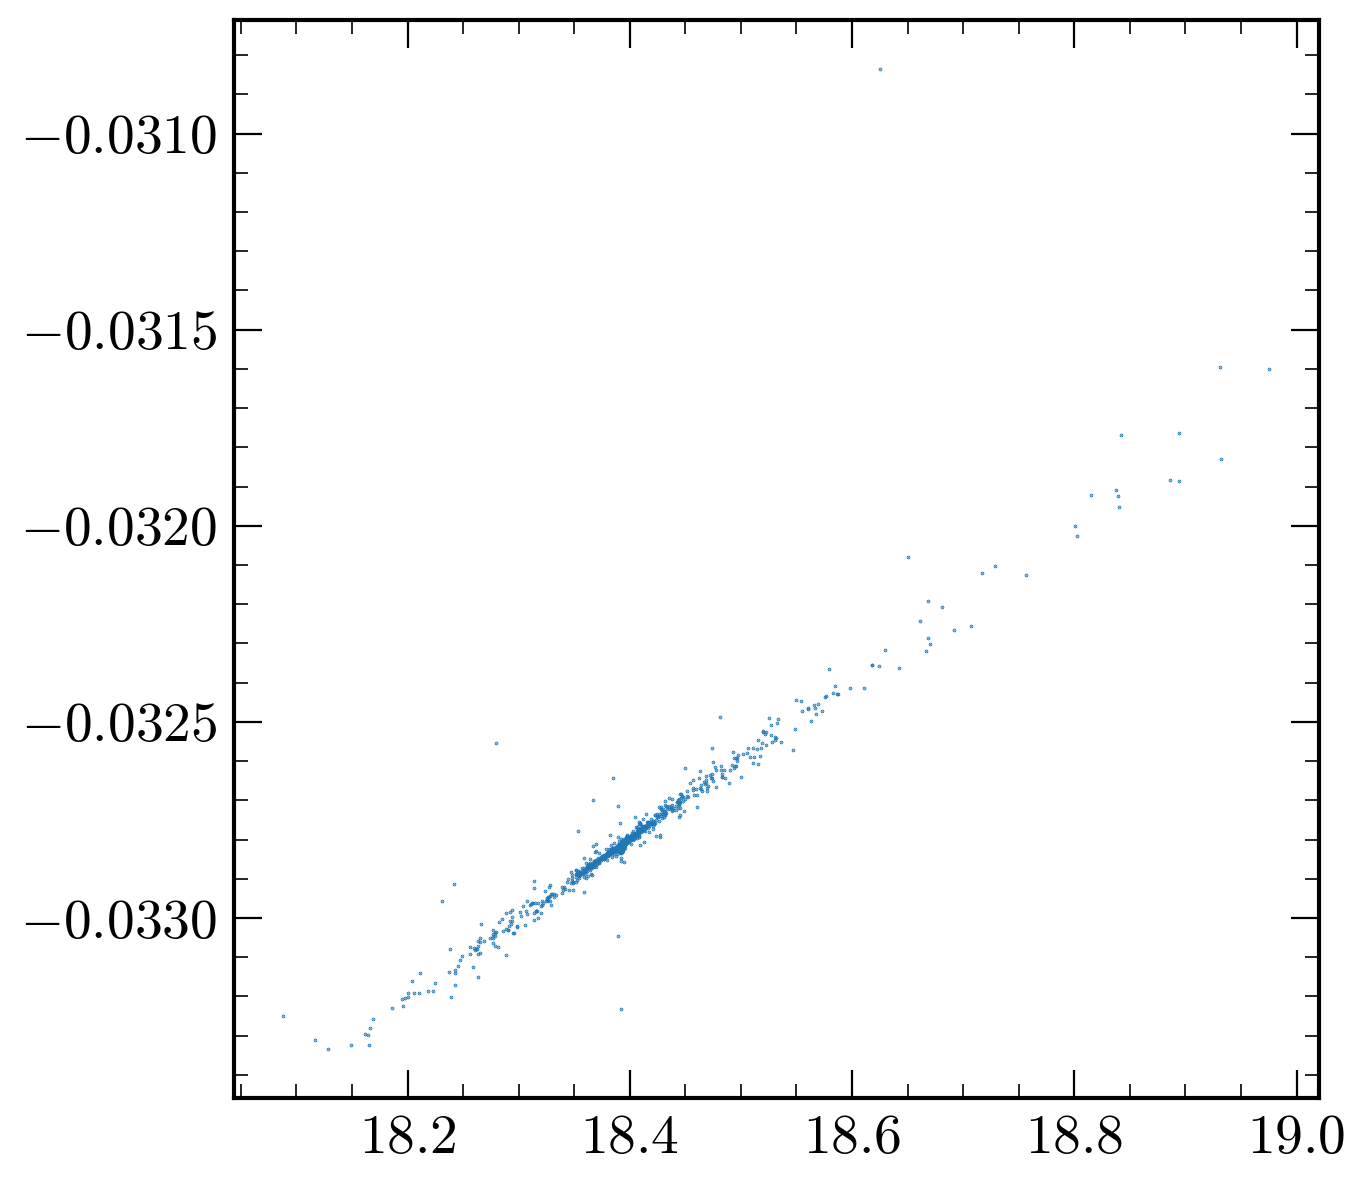

In [184]:
fig, ax = plt.subplots()

x = xyzs[:,0]

clip_low, clip_high = 0.5, 99.5

xlo, xhi = np.percentile(x, clip_low), np.percentile(x, clip_high)
clip_x = (x>xlo) & (x<xhi)

elo, ehi = np.percentile(e_stars, clip_low), np.percentile(e_stars, clip_high)
clip_e = (e_stars>elo) & (e_stars<ehi)


ax.scatter(x[clip_x & clip_e], e_stars[clip_x & clip_e], s=.1)
# ax.set_xlim(19.9984,20.0016)
# ax.set_ylim(-0.03282, -0.03275)
# ax.set_ylim(-0.025, -0.02)

In [190]:
# do as a for loop...

n = 8

for i in tqdm(range(200)):
    singles = petar.Particle(interrupt_mode='bse', external_mode='galpy')
    singles.loadtxt(paths[n]+"data.%i.single"%i)

    pot_stars = singles.pot * u.pc**2 / u.Myr**2

    core_data = petar.Core(interrupt_mode='bse', external_mode='galpy')
    core_data.loadtxt(paths[n]+"data.core")
    core_pos = core_data.pos[i] * u.pc.to(u.kpc)
    R0 = np.sqrt(np.sum(core_pos**2)) * u.kpc
    core_vel = core_data.vel[i] * (u.pc/u.Myr).to(u.kpc/u.Myr)
    core_w = np.hstack([core_pos, core_vel])

    spos = singles.pos*u.pc.to(u.kpc) + core_pos
    svel = singles.vel*(u.pc/u.Myr).to(u.kpc/u.Myr) + core_vel
    single_w = np.hstack([spos, svel])

    stream_obj = StreamFrame(sim_coords = single_w, prog_sim_coord=core_w)

    # define the rotational velocity
    Omega = stream_obj.prog_L_sim*(u.kpc**2 / u.Myr) / (2 * R0**2)
    x, y, z = stream_obj.xs, stream_obj.ys, stream_obj.zs
    xyzs = stream_obj.xyz_s * u.kpc
    vx, vy, vz = stream_obj.vxs, stream_obj.vys, stream_obj.vzs
    v2_stars = vx**2 +vy**2 + vz**2
    v2_stars*=u.kpc/u.Myr

    vxyzs = stream_obj.vxyz_s * u.kpc/u.Myr

    poteff_arg = np.cross(Omega, xyzs)  # shape (N, 3), keeps units
    mag2 = np.sum(poteff_arg**2, axis=1) 
    cts = 0.5 * mag2
    cts = cts.to(u.kpc**2 / u.Myr**2)
    poteff = pot_stars - cts
    ke = v2_stars**2 / 2
    e_stars = ke + poteff

    fig, ax = plt.subplots(figsize=[6,6])

    x = xyzs[:,0]

    clip_low, clip_high = 1, 99

    xlo, xhi = np.percentile(x, clip_low), np.percentile(x, clip_high)
    clip_x = (x>xlo) & (x<xhi)

    elo, ehi = np.percentile(e_stars, clip_low), np.percentile(e_stars, clip_high)
    clip_e = (e_stars>elo) & (e_stars<ehi)


    ax.scatter(x[clip_x & clip_e], e_stars[clip_x & clip_e], s=.1)
    ax.set_title("%i Myr"%i)
    filename = f"frame_{i:05d}.png"
    savedir="scratch_plots/"
    plt.savefig(savedir+filename)
    plt.close()

100%|██████████| 200/200 [02:28<00:00,  1.34it/s]


In [ ]:
e_stars.to(u.pc**2/u.Myr**2)

### this may have been worthless lolol...

<Quantity [-36763.31378397, -36761.07402229, -36795.35190634, ...,
           -35524.57155722, -36760.93035772, -36911.3289366 ] pc2 / Myr2>

### okaky... what about just using the cluster potential? (ie pot - pot_ext)

100%|██████████| 4/4 [00:00<00:00, 413.00it/s]


(0.0, 1.0)

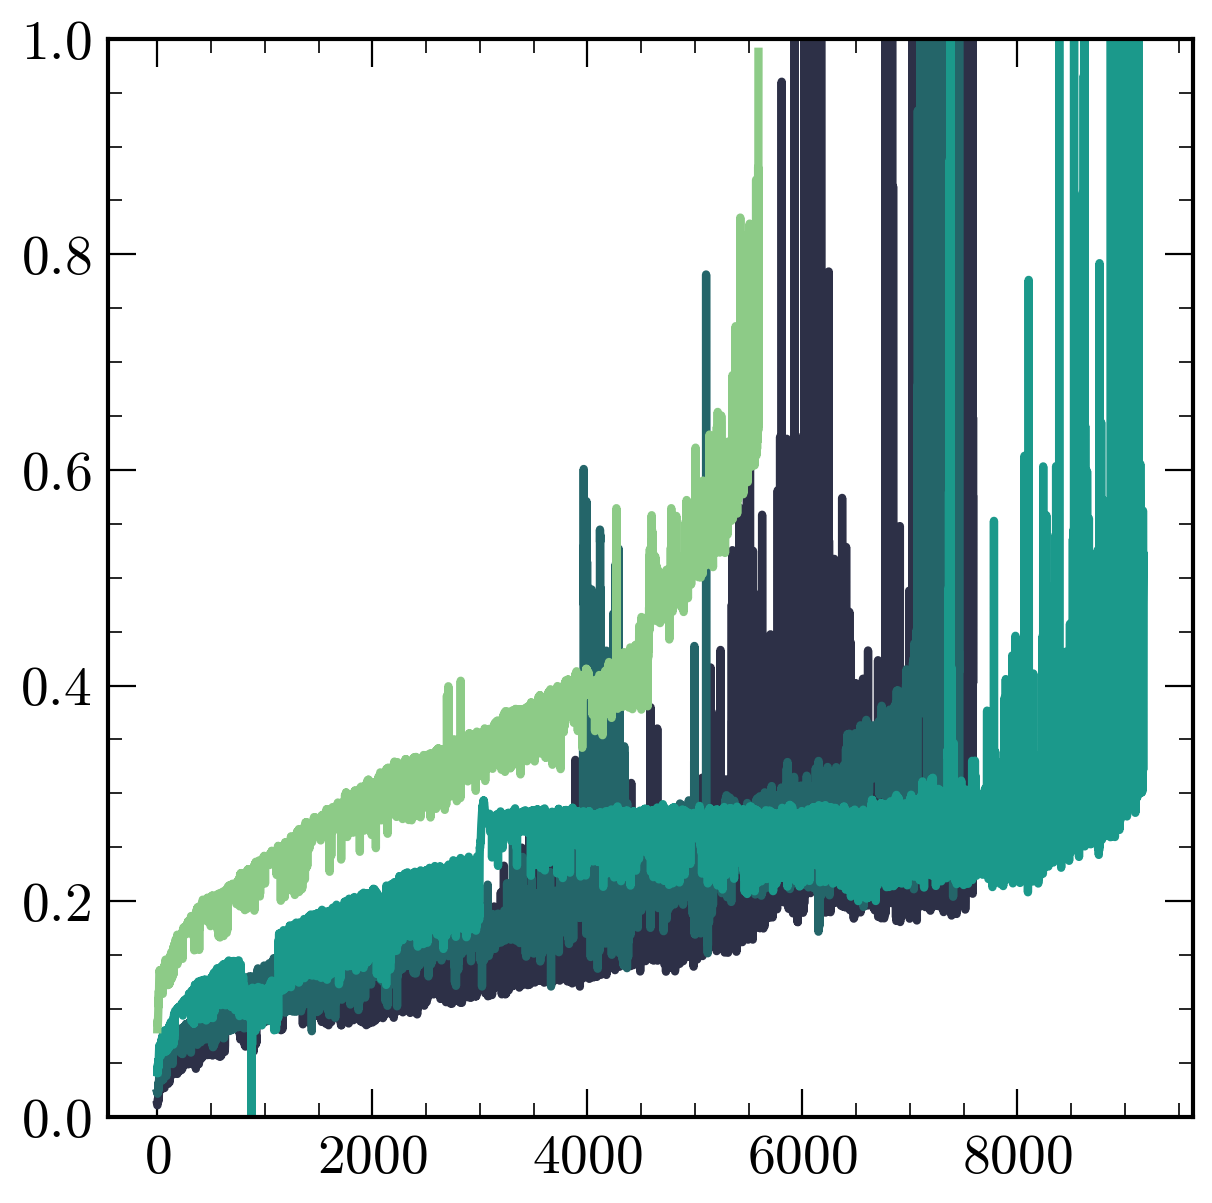

In [62]:
# werkshopped below, testing the npz output from the new structural evolution script:

n_list = [0,2,4,6]
# n_list = [1,3,5,7]

# n_list = [8,10,12,14]
# n_list = [9,11,13,15]

# n_list = [16,18,20,22]
# n_list = [17,19,21,23]

c_index=0
fig, ax = plt.subplots()
for n in tqdm(n_list):
    # if n!=0:
    #     continue
    if n%2==0:
        # print(n%2)
        cs = lm_colors
    else:
        cs=hm_colors

    if n!=12:
        dat = np.load("/n/netscratch/conroy_lab/Lab/amphillips/small_grid/structure_npzs_REAL/%i_structure.npz"%n)
        i_list = dat['i_list']
        rh_energy = dat['rh_energy']
        rtid = dat['rtid']
        nbound = dat['nbound']
        sel = nbound>2000
        ax.plot(i_list[sel], rh_energy[sel]/rtid[sel], c=cs[c_index])
        # ax.plot(i_list[sel][::1], rh_energy[sel][::1], c=cs[c_index])
    c_index+=1
ax.set_ylim(0,1)
# ax.set_ylim(0,30)

In [186]:
rh_vals = []

n=16
i_list = np.arange(0, dissolution_times[n], 10)

n_bounds = []
for i in tqdm(i_list):
    singles = petar.Particle(interrupt_mode='bse', external_mode='galpy')
    singles.loadtxt(paths[n]+"data.%i.single"%i)

    binaries = petar.Binary(member_particle_type=petar.Particle, interrupt_mode='bse', external_mode='galpy')
    binaries.loadtxt(paths[n]+"data.%i.binary"%i)


    pot_singles = (singles.pot - singles.pot_ext) * u.pc**2 / u.Myr**2
    pot_binaries = (binaries.p1.pot - binaries.p1.pot_ext) * u.pc**2 / u.Myr**2

    pot = np.concatenate([pot_singles, pot_binaries])

    # core_data = petar.Core(interrupt_mode='bse', external_mode='galpy')
    # core_data.loadtxt(paths[n]+"data.core")

    sx,sy,sz = singles.pos.T * u.pc
    sr = np.sqrt(sx**2 + sy**2 + sz**2)
    svx, svy, svz = singles.vel.T *(u.pc/u.Myr)
    sv2 = svx**2 + svy**2 + svz**2


    bvx, bvy, bvz = binaries.vel.T*(u.pc/u.Myr)
    bv2 = bvx**2 + bvy**2 + bvz**2
    bx,by,bz = binaries.pos.T * u.pc
    br = np.sqrt(bx**2 + by**2 + bz**2)

    v2 = np.concatenate([sv2, bv2])

    k = 1/2 * v2

    E = k + pot

    E_sel = E.to(u.pc**2/u.Myr**2)<=0

    # concatenate r
    r = np.concatenate([sr, br])
    m = np.concatenate([singles.mass, binaries.mass]) * u.Msun

    # select for E<0

    # calc half mass radius.
    rh = paf.calculate_half_mass_radius(m.to(u.Msun).value[E_sel], r.to(u.pc).value[E_sel])
    n_bounds.append(len(m[E_sel]))
    rh_vals.append(rh)

100%|██████████| 541/541 [03:10<00:00,  2.85it/s]


Text(0, 0.5, 'r_h [pc]')

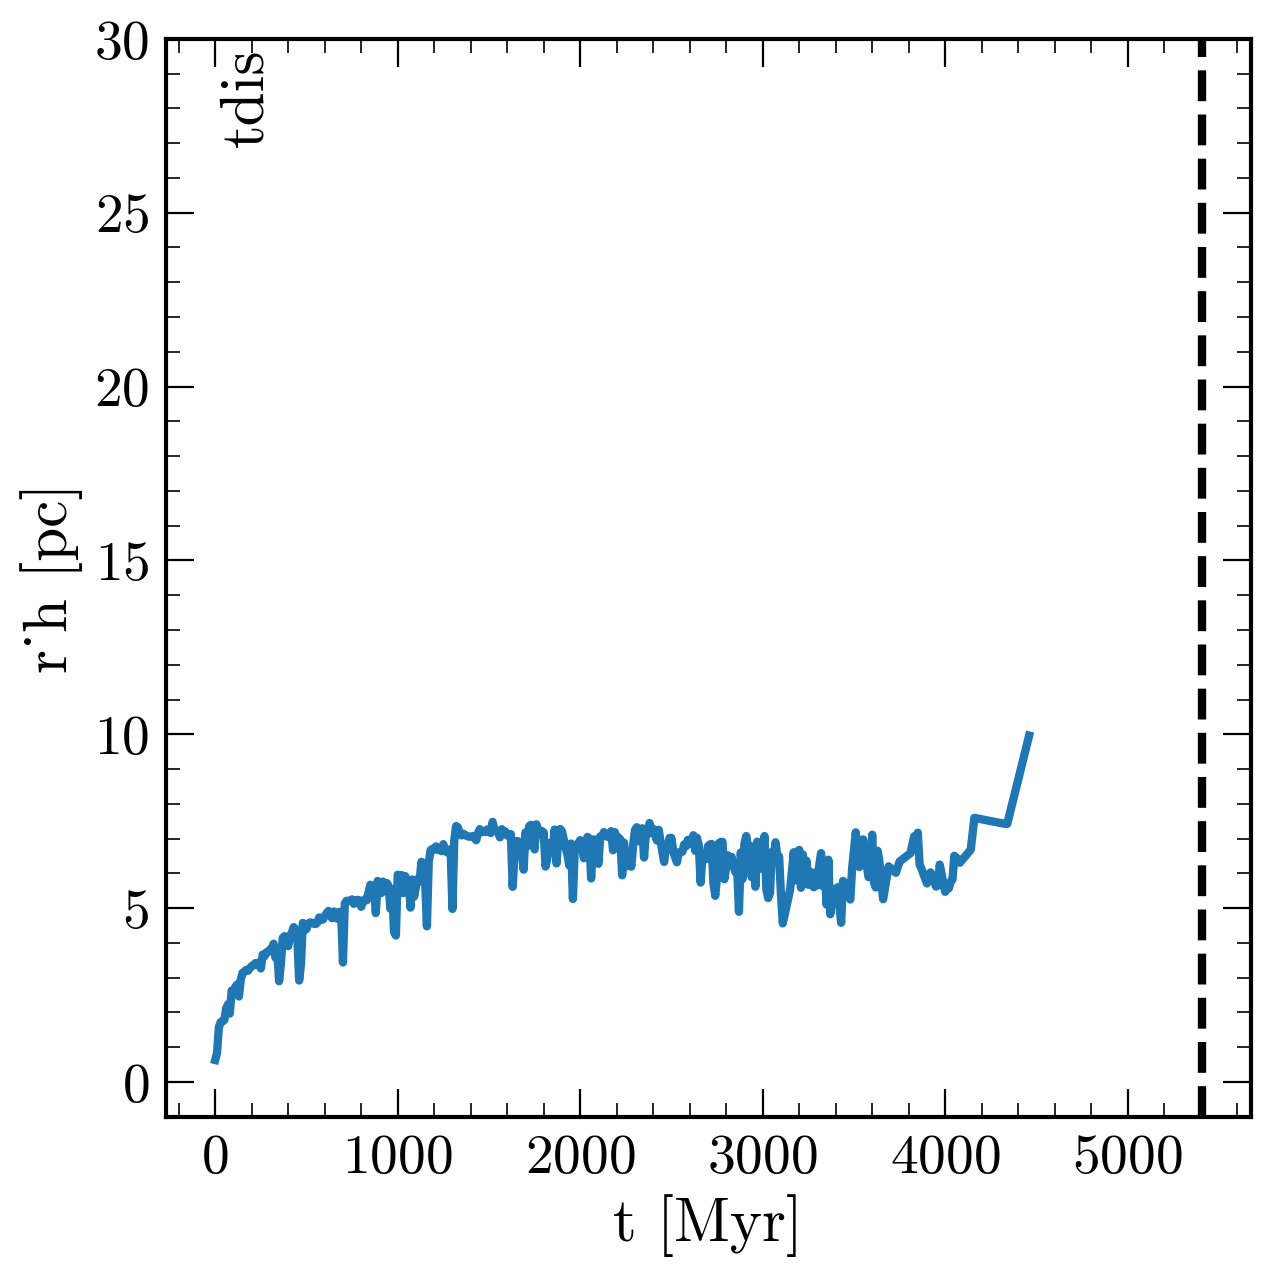

In [195]:
fig, ax = plt.subplots()
N_sel = np.array(n_bounds)>1000

ax.plot(i_list[N_sel], np.array(rh_vals)[N_sel])

ax.axvline(dissolution_times[n], c='k', linestyle='--', label='tdis')
# ax.plot(i_list, np.array(n_bounds))
ax.set_ylim(-1,30)
ax.text(0.1, 0.9, 'tdis', rotation='vertical', ha='right', va='bottom', transform=ax.transAxes)
ax.set_xlabel('t [Myr]')
ax.set_ylabel('r_h [pc]')

# an iterative approach to finding a convergent half mass radius >:(

**update i like this way better. will be nice to go to cannon and make movies watching this half mass radius evolve a bit to get a sense of whether it behaves ``cleanly"

In [127]:
# path = "/Users/anyaphillips/Desktop/harvard/research/data/grid_summary/sim14_moved/" # from my machine

n = 0
path = paths[n]
tdis = dissolution_times[n]
tol=7e-3

rh_vals = []

i_list = np.arange(0,1020,20)
for i in tqdm(i_list):

    tidal = petar.Tidal(interrupt_mode='bse', external_mode='galpy')
    tidal.loadtxt(path+"data.tidal")
    # print(tidal.n[i])

    singles=petar.Particle(interrupt_mode='bse', external_mode='galpy')
    singles.loadtxt(path+"data.%i.single"%i)

    binaries = petar.Binary(member_particle_type=petar.Particle, interrupt_mode='bse',
                            external_mode='galpy')
    binaries.loadtxt(path+"data.%i.binary"%i)

    x,y,z = singles.pos.T
    sr = np.sqrt(x**2+y**2+z**2)
    sm = singles.mass

    x,y,z = binaries.pos.T
    br = np.sqrt(x**2+y**2+z**2)
    bm = binaries.mass

    r = np.concatenate([sr, br])
    m = np.concatenate([sm, bm])



    sort_ind = np.argsort(r)
    sorted_r = r[sort_ind]
    sort_m = m[sort_ind]

    cumulative_mass = np.cumsum(sort_m)
    half_mass = cumulative_mass/2

    arr = np.concatenate([np.zeros(1), half_mass])
    contained_mass_dif = np.diff(arr) / arr[1:]

    rh = max(sorted_r[contained_mass_dif>tol])
    rh_vals.append(rh)
    # fig, ax = plt.subplots()
    # ax.plot(sorted_r[contained_mass_dif>tol], contained_mass_dif[contained_mass_dif>tol], lw=1)
    # ax.set_yscale('log')
rh_vals = np.array(rh_vals)



# ind = np.arange(0, len(sort_m), 1)
# fig, ax  = plt.subplots()
# ax.plot(sorted_r[contained_mass_dif>tol], contained_mass_dif[contained_mass_dif>tol], lw=1)
# ax.set_yscale('log')

100%|██████████| 51/51 [00:08<00:00,  5.73it/s]


In [ ]:
singles.e

Type:           Particle
String form:    <petar.data.Particle object at 0x148c8c153c10>
File:           ~/software/petar_install/include/petar/data.py
Docstring:     
Particle class 
    The particle data of PeTar. Depending on the compile configuration of PeTar, 
    The data structures (columns) of the particle snapshots are different.
    Using the correct keyword arguments in the initialization to control the member definition (Keys)

keys: (class members)
    The final keys are a combination of sub keys depending on keyword arguments (kwargs) of initial function

    Sub key list:

    std: [inherit SimpleParticle]
    bstat: binary_state: binary interruption state 
    se: radius:        (1D): radius for merger checker
        dm:            (1D): mass loss
        time_record    (1D): last time of interruption check
        time_interrupt (1D): next interruption time
    bse: star  (SSEStarParameter): BSE based stellar evolution parameters
    ptcl: r_search (1D): searching radi

(0.0, 10.0)

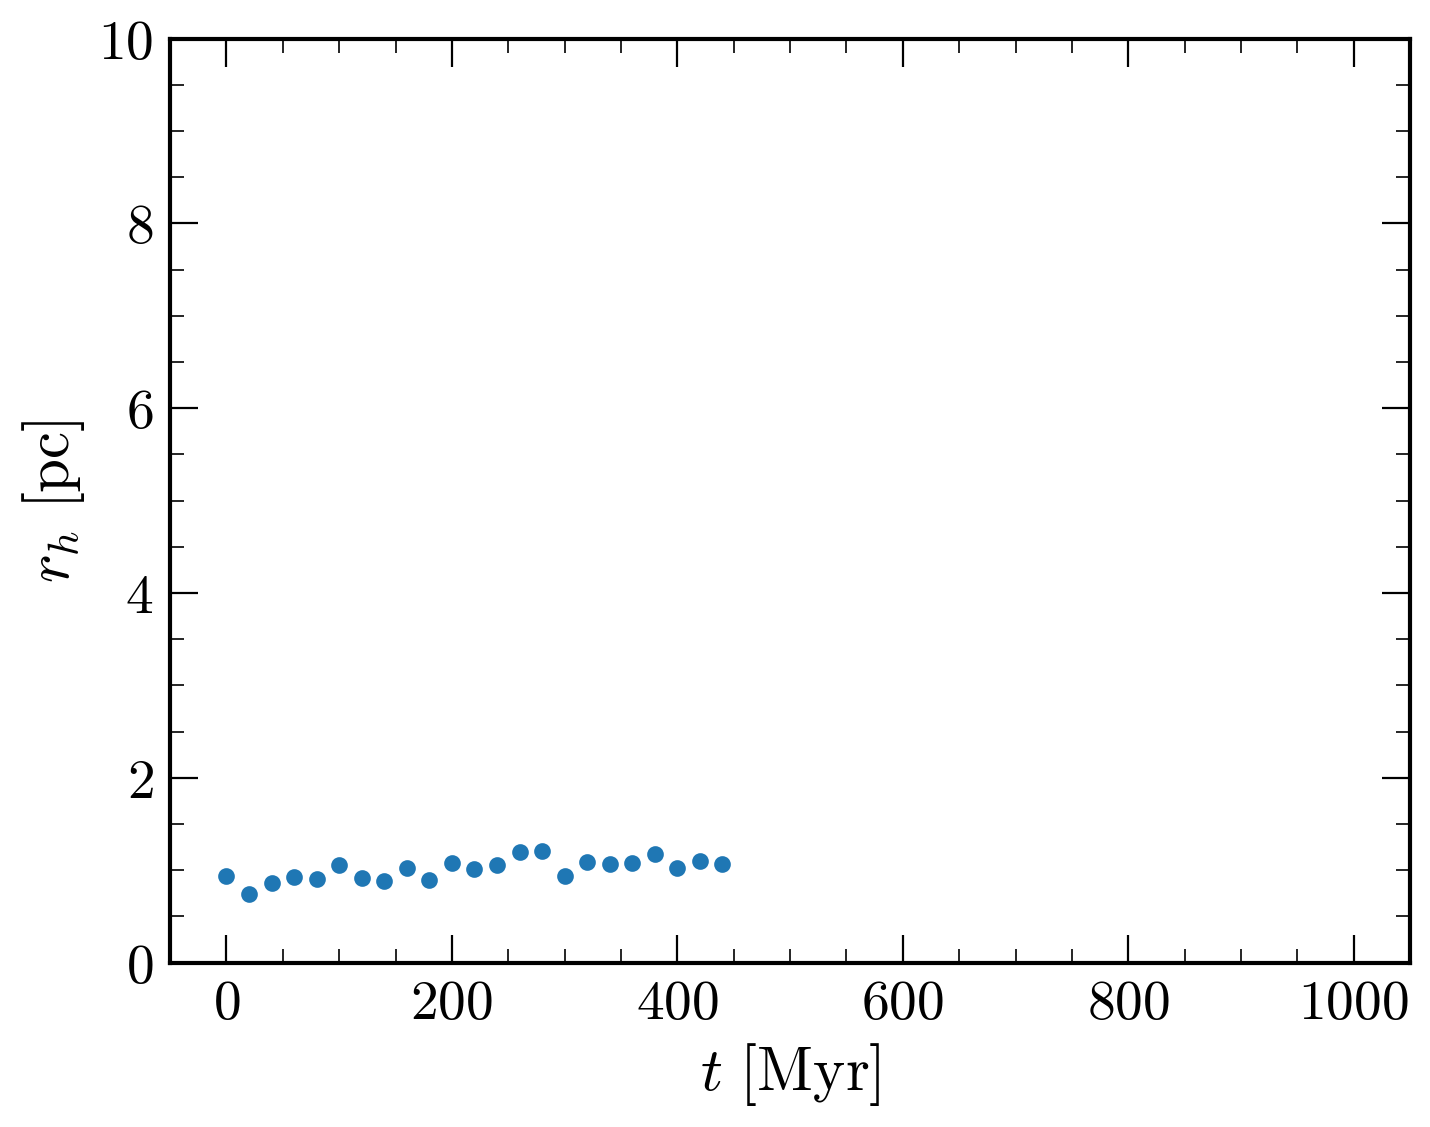

In [129]:
fig, ax = plt.subplots(figsize=[8,6])

# ax.plot(tidal.time, tidal.rtid)
ax.scatter(i_list, rh_vals)
ax.set_xlabel(r"$t\ \rm[Myr]$")
ax.set_ylabel(r"$r_h\ \rm[pc]$")
ax.set_ylim(0,10)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:01<00:00,  2.67it/s]


(0.0, 30.0)

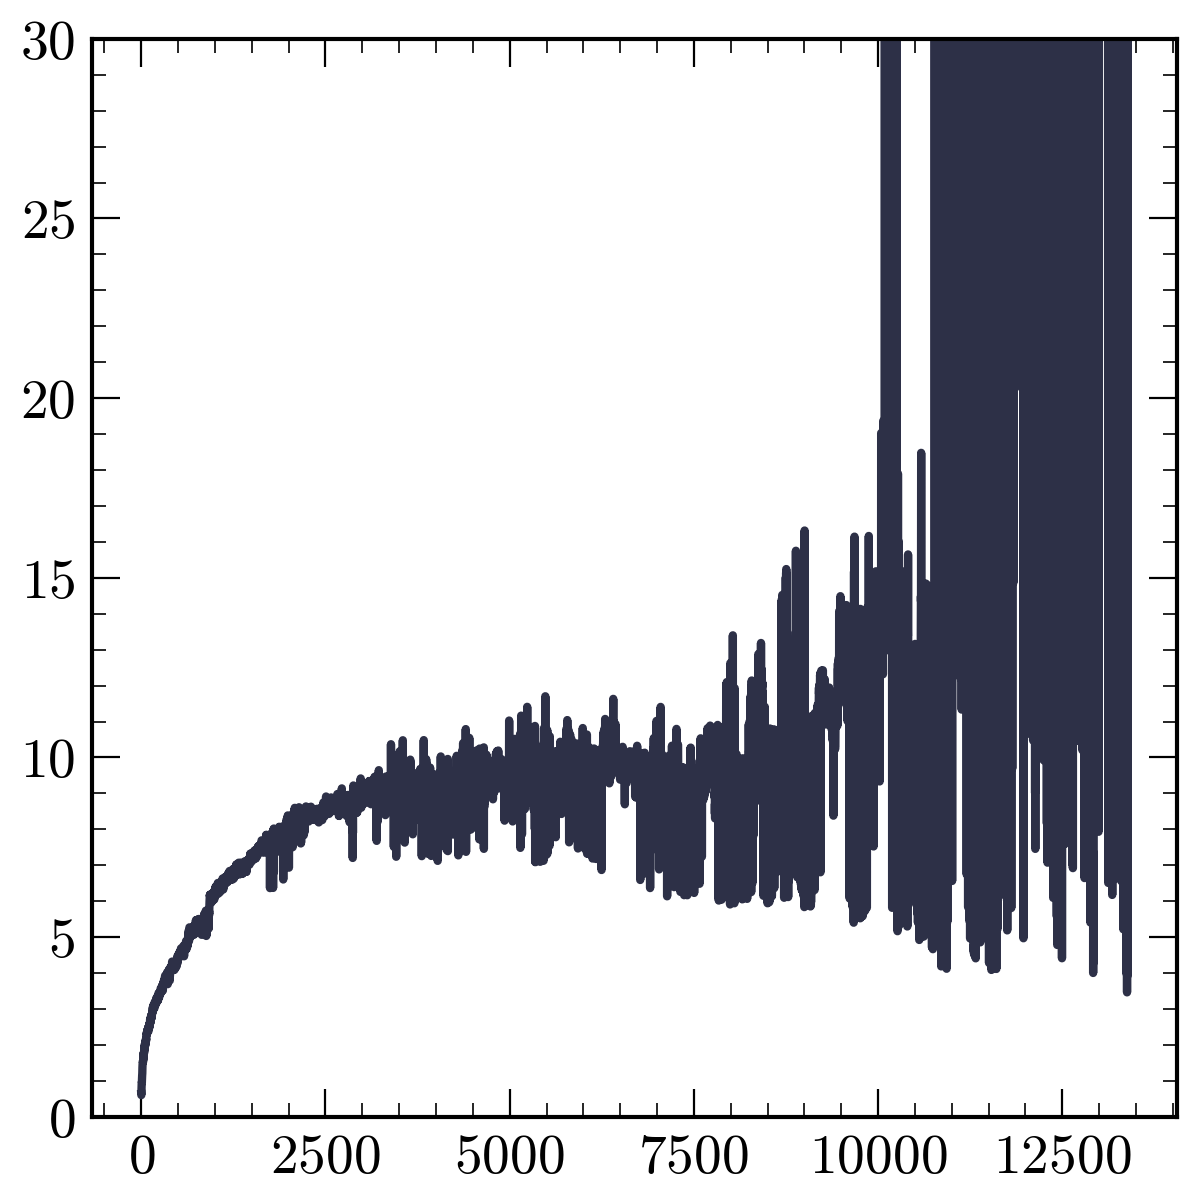

In [151]:
n_list = [0,2,4,6]
# n_list = [1,3,5,7]
# n_list = [8,10,12,14] 
# n_list = [9,11,13,15]
# n_list = [16,18,20,22]

c_index=0
fig, ax = plt.subplots()
for n in tqdm(n_list):
    if n!=0:
        continue
    if n%2==0:
        # print(n%2)
        cs = lm_colors
    else:
        cs=hm_colors

    path=paths[n]
    core = petar.Core(interrupt_mode='bse', external_mode='galpy')
    core.loadtxt(path+'data.core')


    tidal=petar.Tidal(interrupt_mode='bse')
    tidal.loadtxt(path+'data.tidal')

    # check how much mass is still within rtid
    mass0 = tidal.n[0]
    mass = tidal.n

    m_frac = mass/mass0 # fraction of stars still bound


    lagr = petar.LagrangianMultiple()
    lagr.loadtxt(path+"data.lagr")

    cadence=1
    mf = m_frac[:dissolution_times[n]][::cadence]
    sel = mf>0.0
    t = tidal.time[:dissolution_times[n]][::cadence][sel]
    rtid = tidal.rtid[:dissolution_times[n]][::cadence][sel]
    rh = lagr.all.r[:,2][:dissolution_times[n]][::cadence][sel]
    ax.plot(t, rh, c=cs[c_index])
    c_index+=1
ax.set_ylim(0,30)